# Steepest descent aplicado à função Rosenbrock

Este algoritmo aplica o método de otimização Steepest descent à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método steepest descente é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

A proposta do código é encontrar o mínimo da função através de muitas iterações.

O método steepest descent é um método de convergência global, o qual se aproxima do mínimo com a direção de $-\nabla \boldsymbol{\phi}(\mathbf{p})$, que é menos o gradiente da função objetivo e $\mathbf{p}$ é o vetor de parâmentros. Porém, para uma melhor aproximação do mínimo é necessário de um critério mais rigoroso para a escolha da largura do passo. Para isso a chamada regra de Armijo é um exemplo de line search. A condição a ser satisfeita para uma direção mais aceitável é, então:

\begin{equation}
\boldsymbol{\phi}(\mathbf{p}_{k+1}) - \boldsymbol{\phi}(\mathbf{p}_k) < -\alpha \lambda\| \nabla\boldsymbol{\phi}(\mathbf{p}_k) \|^2  ,
\end{equation}

onde $\lambda = \beta^m$, $m \geq 0$ é o menor não-negativo inteiro para uma descida suficiente e $\alpha,\beta$ $\epsilon$ $(0,1)$.

1) estabelece um chute inicial $\mathbf{p}_i$

2) determina a direção $\mathbf{a}_i$ que diminua $\boldsymbol{\phi}$ em torno de $\mathbf{p}_i$

3) calcula $\mathbf{p}_{i+1} = \mathbf{p}_i -\lambda\nabla \boldsymbol{\phi}(\mathbf{p})$

4) verifica a condição de Armijo, enquanto $\boldsymbol{\phi}(\mathbf{p}_{k+1}) - \boldsymbol{\phi}(\mathbf{p}_k) > \alpha \lambda\| \nabla\boldsymbol{\phi}(\mathbf{p}_k) \|^2$:

a) caso não seja satisfeita $m = m + 1$

b) calcula $\lambda = \beta^m$

c) calcula $\mathbf{p}_{+} = \mathbf{p}_i -\lambda\nabla \boldsymbol{\phi}(\mathbf{p})$

d) calcula $\phi(\mathbf{p}_{+})$ e reorna para 4)
 
5) testa a convergência, se for satisfeita o algoritmo para, caso contrário retorna para 1)

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Plotando a função

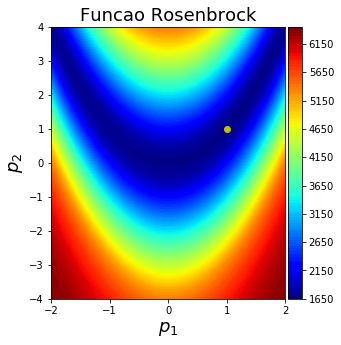

In [2]:
# numero de parametros de p1 e p2
np1 = 50
np2 = 50

#definindo os parâmetros
p1 = np.linspace(-2., 2., np1)
p2 = np.linspace(-4., 4., np2)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = 100.*(p2 - p1*p1)*(p2 - p1*p1) + (p1 - 1.)*(p1 - 1.)

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(np1,np2))

#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
#plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


# Funções

In [3]:
# calculando a phi
def rosenbrock(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 100.*(p0[1] - p0[0]*p0[0])*(p0[1] - p0[0]*p0[0]) + (p0[0] - 1.)*(p0[0] - 1.)
    
    return phi

# calculando gradiente de phi
def grad_rosenbrock(p0):
    '''
    Calcula o gradiente da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    grad: array 1D - vetor gradiente calculado em cada ponto (p1, p2)
    '''
    grad = np.zeros(2)
    grad[0] = -400.*p0[0]*(p0[1] - p0[0]*p0[0]) + 2.*(p0[0] - 1.) 
    grad[1] = 200.*(p0[1] - p0[0]*p0[0])

    return grad

# Chute inicial e parâmetros de entrada

In [4]:
# chute inicial
p01 = -1.
p02 = 3.

# vetor de parâmetros
p0 = np.array([p01,p02]) 

# parâmetros para o critério de Armijo
alfa = 0.0001
beta = 0.4

# valor da função para o chute inicial
phi0 = rosenbrock(p0)

# armazenando o chute inicial
p1_list = [p01]
p2_list = [p02]
phi_list = [phi0]

# número de iteração máximo
itmax = 10000

# critério de parada
epsilon = 1e-10

# Steepest Descent com critério de Armijo

In [5]:
for i in range(itmax):
    m = 0.
    lamb = 1.
    # calcula grad, p e phi
    grad = grad_rosenbrock(p0)
    p = p0 - lamb*grad
    phi = rosenbrock(p)
    
    # condição de Armijo
    while (phi - phi0) > alfa*lamb*np.sum(grad*grad):
        m += 1.
        #print m
        lamb = beta**m
        #print lamb
        p = p0 - lamb*grad
        phi = rosenbrock(p)
        #print phi
        #grad = grad_rosenbrock(p)
        #print grad
    
    # printa os valores
    print 'itreação: %3d   p1: %.2f   p2: %.2f   f: %.2e' % (i, p[0], p[1], phi)
    
    # armazena os valores nas listas
    phi_list.append(phi)
    p1_list.append(p[0])
    p2_list.append(p[1])
    
    # critério de parada
    if abs(phi - phi0)/phi0 < epsilon:
        break
    else:
        # atualizando para a próxima iteração
        p0 = p.copy()
        phi0 = phi

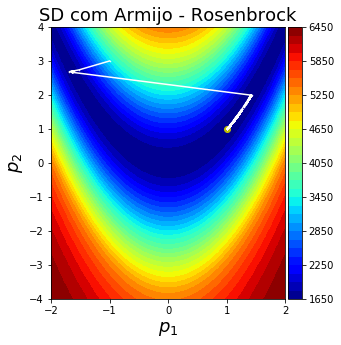

In [6]:
#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=1)
plt.title('SD com Armijo - Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.savefig('plot_rosenbrock_Armijo.png', pad_inches=0.0)
plt.show()

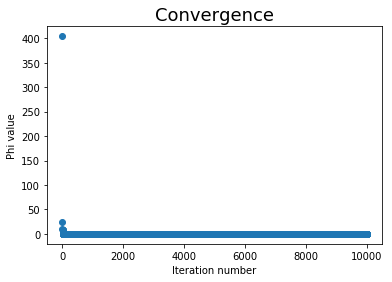

In [7]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list, 'o')
plt.savefig('convergence.png', dpi=300)
plt.show()